In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
boston_aux = load_boston()

In [20]:
boston_aux.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [26]:
print(boston_aux['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [24]:
boston  = pd.DataFrame(boston_aux['data'],columns= boston_aux['feature_names'] )

In [27]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [28]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


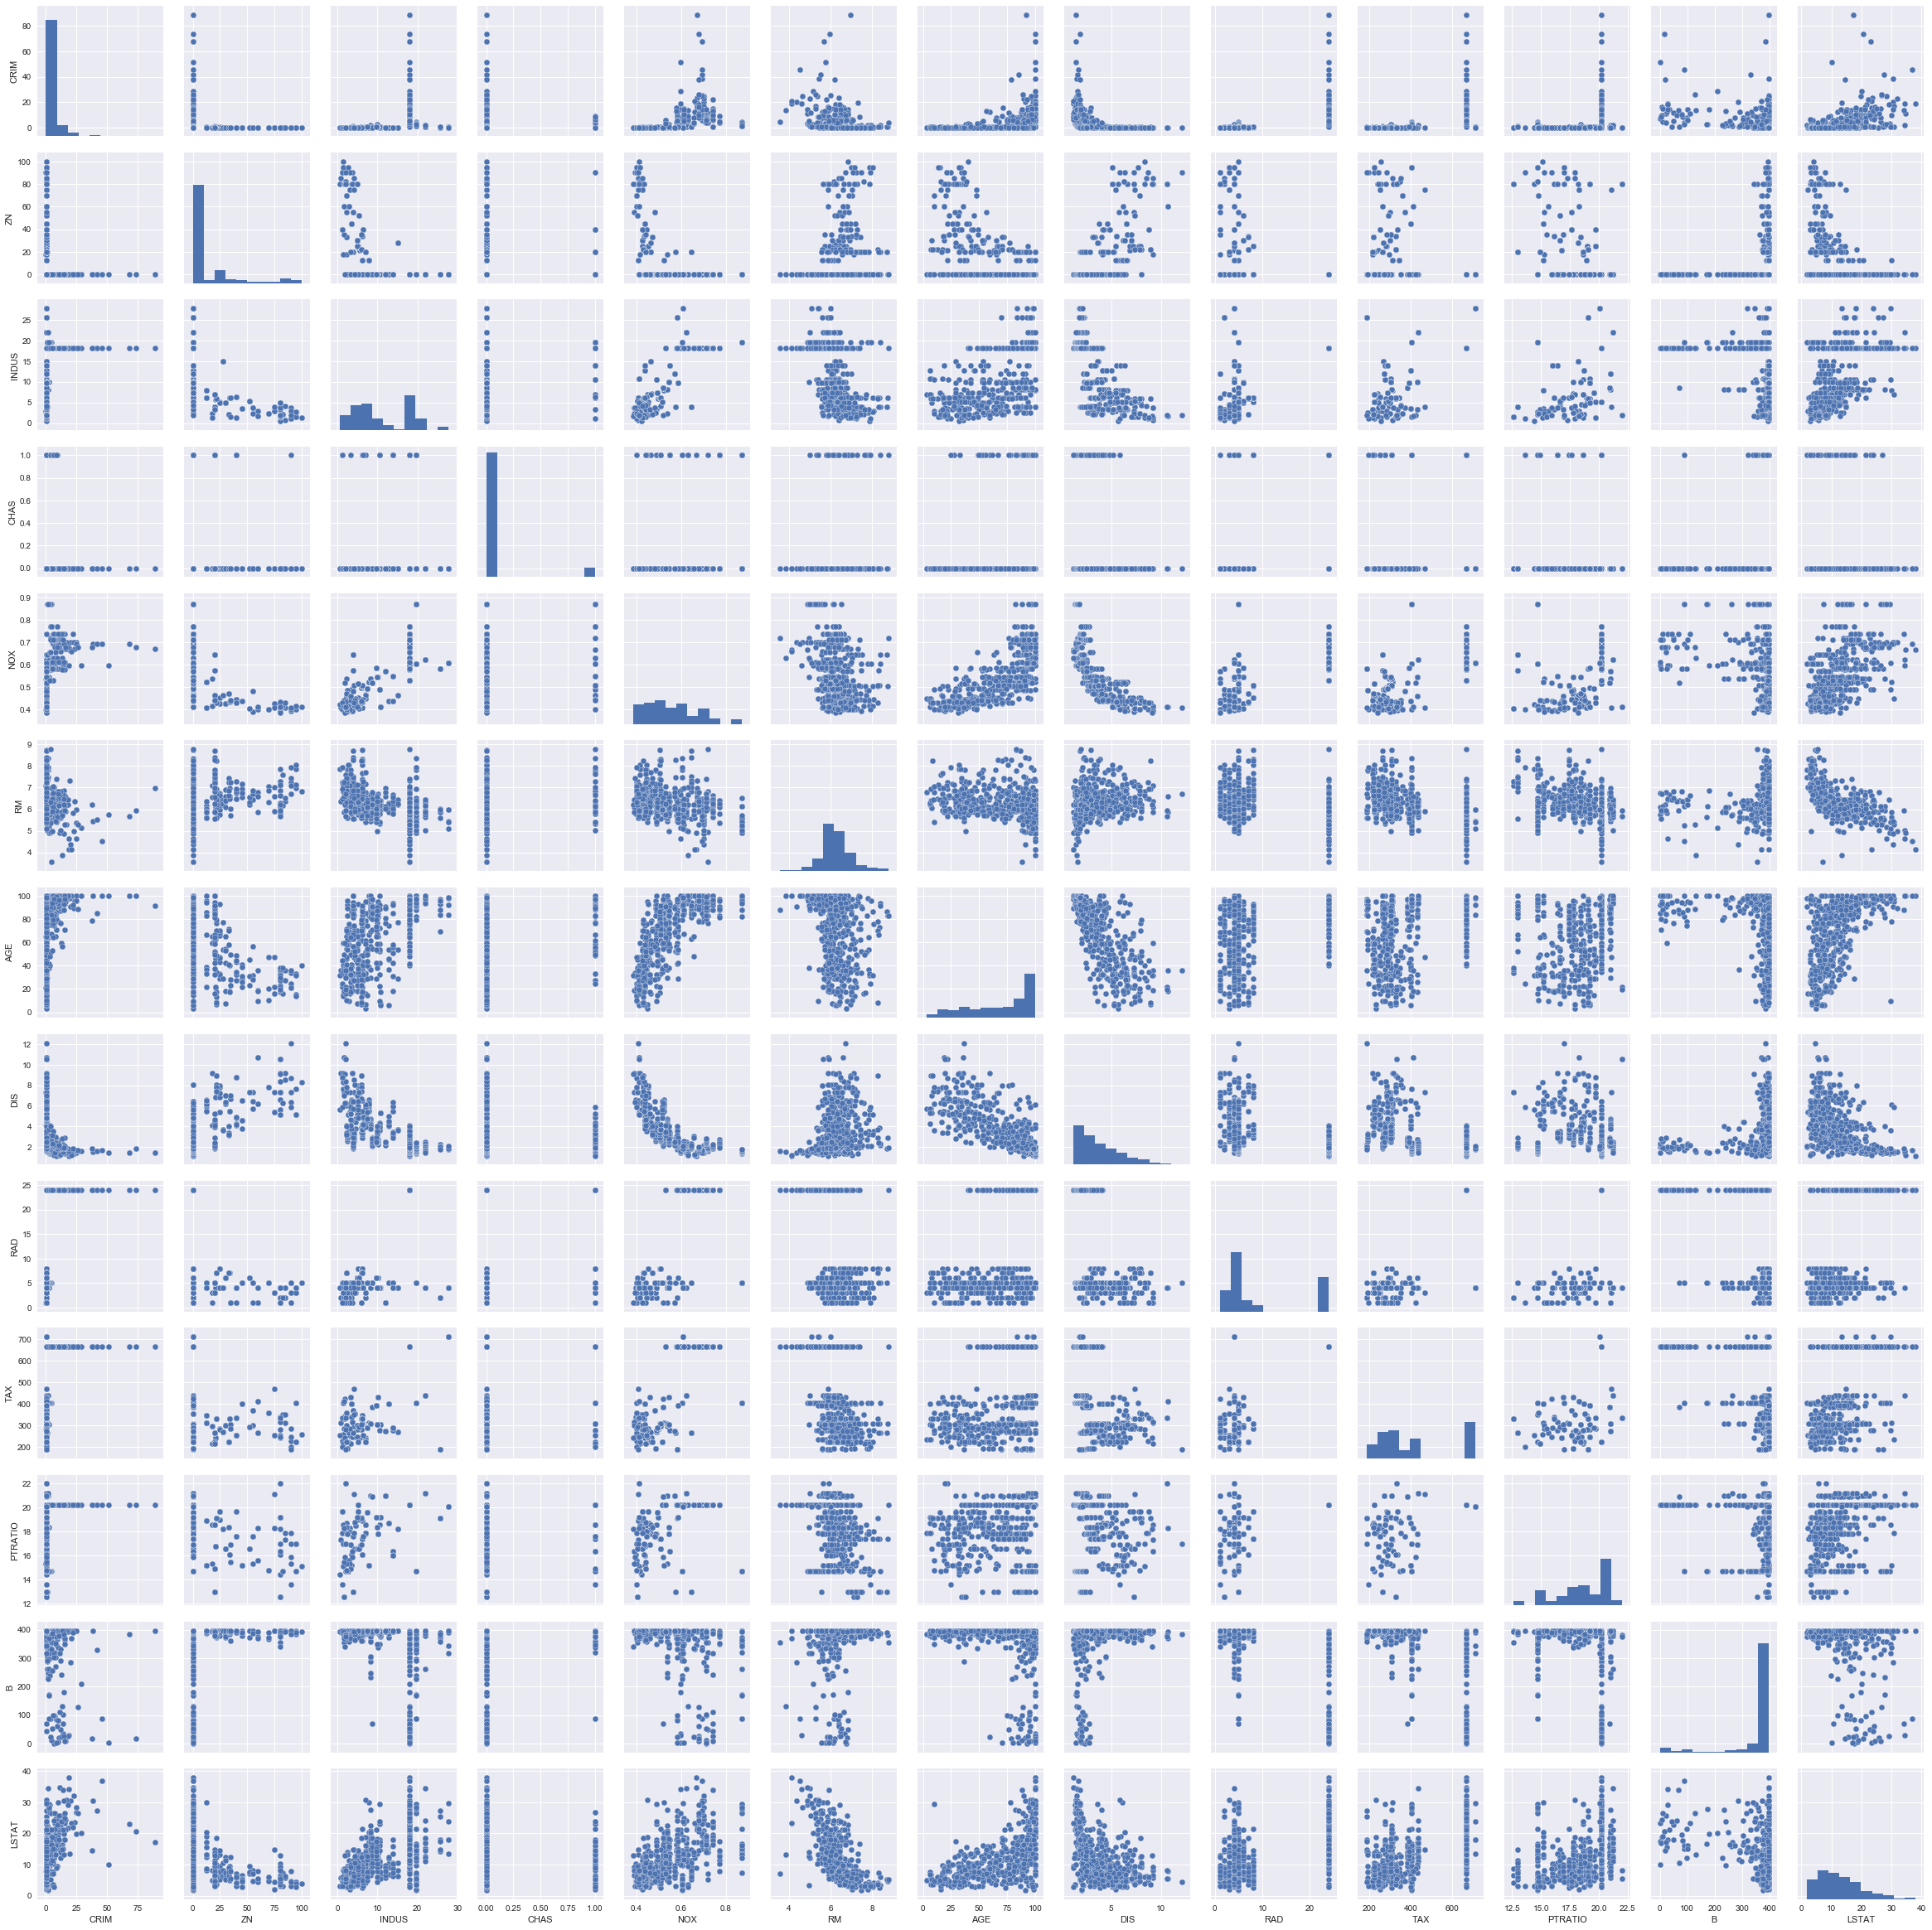

In [35]:
sns.pairplot(boston)

In [37]:
priceDF  = pd.DataFrame(boston_aux['target'])

In [39]:
priceDF.columns = ['Price']

In [40]:
priceDF.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [43]:
boston = pd.concat([boston,priceDF],axis=1)

In [44]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


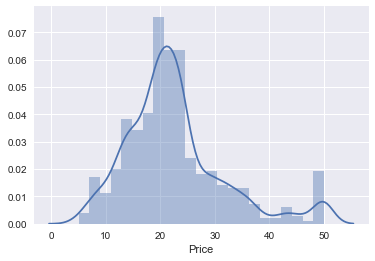

In [47]:
sns.distplot(boston['Price'])

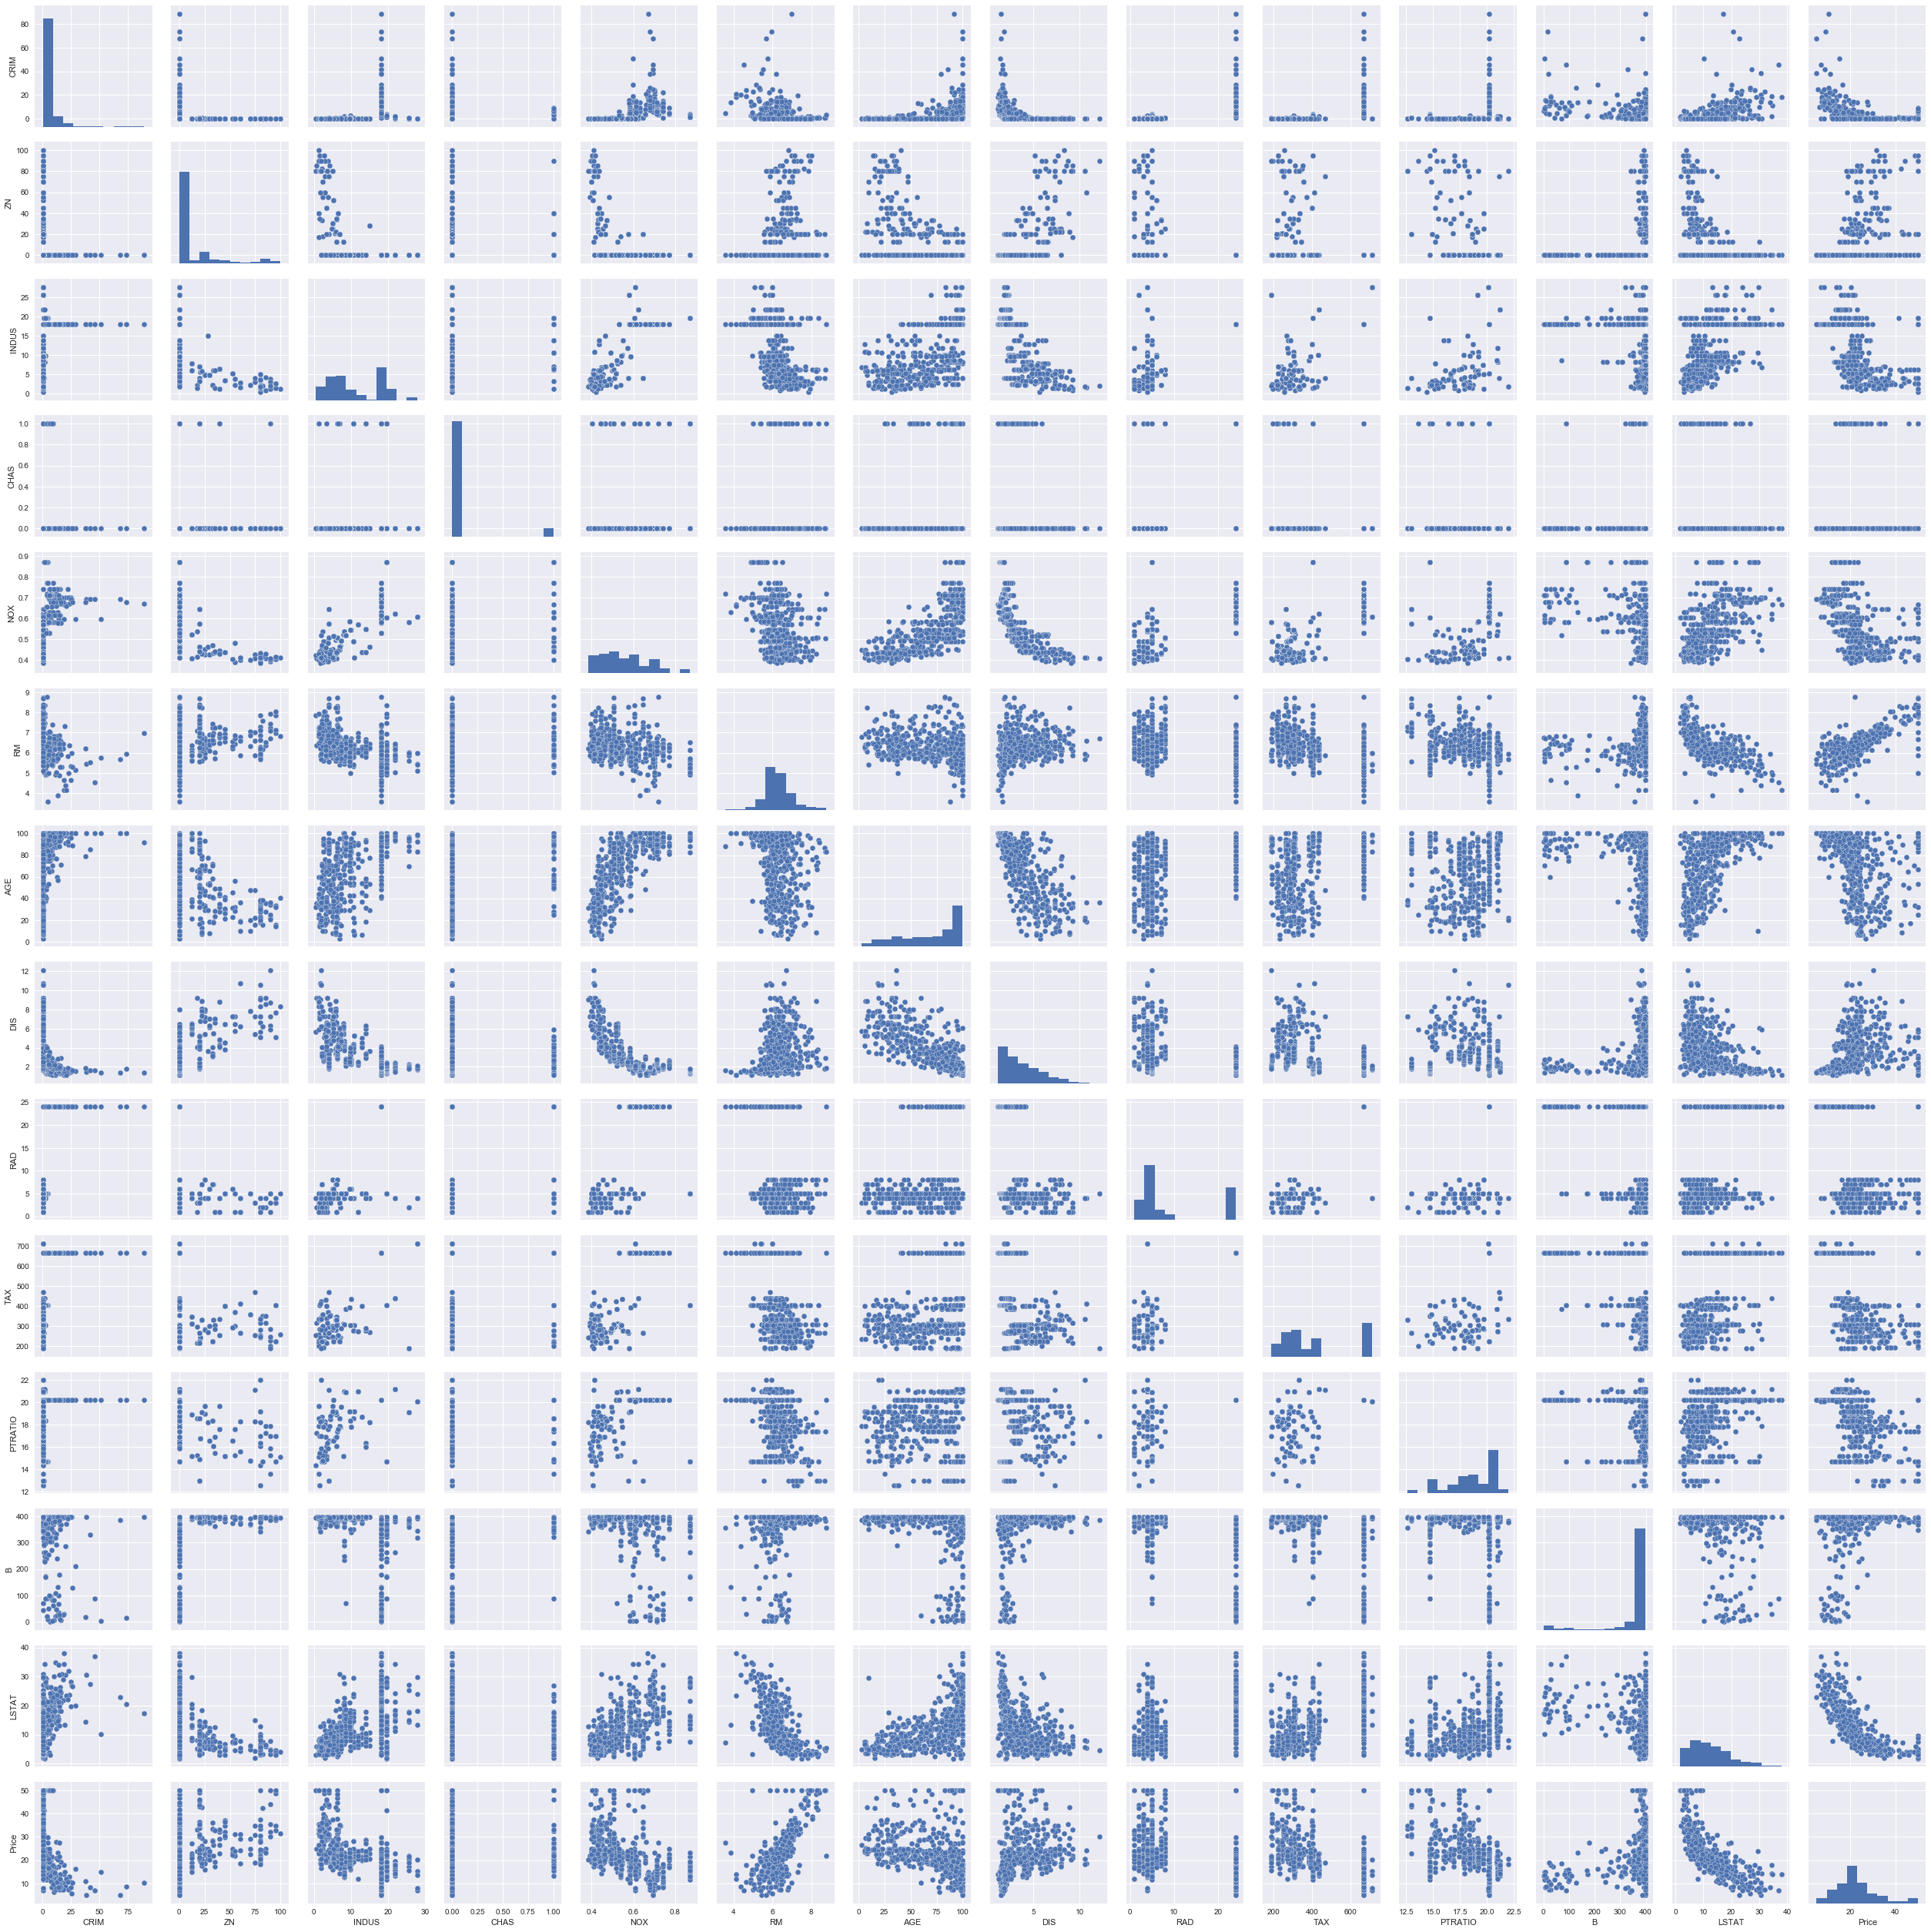

In [45]:
sns.pairplot(boston)

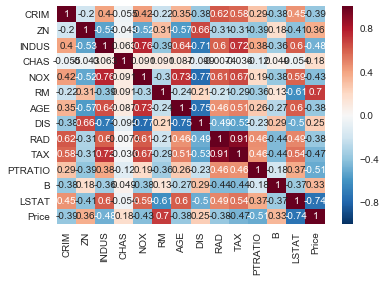

In [49]:
sns.heatmap(boston.corr(),annot=True)

Até agora as variáveis que vi que podiam ter uma boa regressão são ,    
    criminalidade- > quanto maior criminalidade, menos o preço.    
     Nox ->  quanto maior a quantidade de óxido nitroso , mais industrias?     
     RM - > maior quantidade de quartos, maior preço.     
     lstat - > quanto maior a porcentagem de população pobre, menor o preço da casa.   
     

In [50]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [56]:
#
X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
#target
y = boston[['Price']]

In [53]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
coeff_df = pd.DataFrame(lm.coef_[0],X.columns,["Coefficient"])

In [74]:
coeff_df

,Coefficient
CRIM,-0.117331
ZN,0.041182
INDUS,0.014771
CHAS,2.908745
NOX,-21.046405
RM,3.475828
AGE,-0.013127
DIS,-1.695700
RAD,0.268089
TAX,-0.009480


In [75]:
lm.coef_

array([[ -1.17331281e-01,   4.11821484e-02,   1.47707916e-02,
          2.90874459e+00,  -2.10464054e+01,   3.47582783e+00,
         -1.31268752e-02,  -1.69569980e+00,   2.68088777e-01,
         -9.48021809e-03,  -9.32386354e-01,   5.84352469e-03,
         -5.25762623e-01]])

In [78]:
predictions = lm.predict(X_test)

In [79]:
predictions

array([[ 12.65273826],
       [ 35.43718297],
       [ 29.85206219],
       [ 41.99504824],
       [ 19.08136523],
       [ 18.54728705],
       [ 22.85529944],
       [ 21.83354916],
       [ 37.26841305],
       [ 14.10354227],
       [ 24.70517667],
       [ 12.86848853],
       [ 29.73154936],
       [ 26.8142081 ],
       [ 15.58465654],
       [ 24.85041884],
       [ 13.92865962],
       [ 17.44826782],
       [  7.44420396],
       [ 13.74848708],
       [ 19.78205247],
       [ 21.12462054],
       [ 25.55962295],
       [ 32.84718164],
       [ 17.6467984 ],
       [ 30.63008621],
       [ 22.81345458],
       [ 21.92413407],
       [ 13.8544446 ],
       [ 23.49218652],
       [ 28.67928311],
       [ 32.29057372],
       [ 35.46803665],
       [ 16.44998168],
       [ 25.92817979],
       [ 25.14948599],
       [ 25.8922525 ],
       [ 27.66236661],
       [ 18.40145663],
       [ 18.07549365],
       [ 30.6471988 ],
       [ 22.64198694],
       [ 20.22060391],
       [ 38

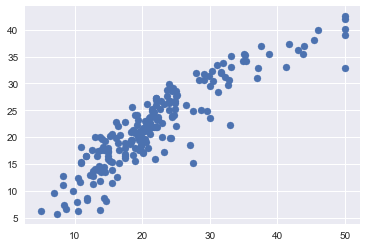

In [81]:
plot.scatter(y_test,predictions)

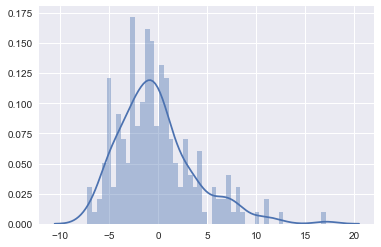

In [82]:
sns.distplot((y_test-predictions),bins=50);
#RESIDUO, y_test - predição.

In [83]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.99859664863
MSE: 15.5959660394
RMSE: 3.94917282977
